In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gzip
import pandas as pd
from io import StringIO
import os
#www.labri.fr/perso/bourqui/downloads
from datetime import datetime,timedelta
import seaborn as sns

In [2]:
filepath = os.path.join("clean", os.path.join("01. Duc", "2018-05-24 11_30_00.csv.gz"))

with gzip.open(filepath, "rb") as b:
    station = pd.read_csv(StringIO(str(b.read()).replace("\\n", "\n")[2:-1]), sep=";", parse_dates=["Timestamp"])

station.describe()

,Bikes,Slots,Total,Humidity,Pressure,WindSpeed,TemperatureTemp
count,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000,2763.000000
mean,3.304017,6.301846,9.605863,71.973941,1014.563094,2.196200,22.969233
std,2.185184,2.456004,0.609419,14.788273,3.673456,1.211109,3.379047
min,0.000000,1.000000,7.000000,39.000000,1006.000000,0.500000,14.330000
25%,1.000000,4.000000,9.000000,60.000000,1012.000000,1.500000,20.430000
50%,3.000000,6.000000,10.000000,73.000000,1015.000000,2.100000,22.710000
75%,5.000000,9.000000,10.000000,83.000000,1017.000000,2.600000,25.775000
max,8.000000,10.000000,10.000000,134.000000,1026.380000,9.300000,29.510000


In [3]:
start = station[station['Timestamp'].apply(lambda x :x.hour == 0)]['Timestamp'].iloc[0] 
end = start + timedelta(days=1)
b = (station['Timestamp'] >= start) & (station['Timestamp'] < end)

day = station[b]

day.index = day['Timestamp']
day = day.resample('H').mean().reset_index()
day["Hour"] = day["Timestamp"].apply(lambda x: x.hour)
day["Status"] = station["Status"]
day.head()

,Timestamp,Bikes,Slots,Total,Humidity,Pressure,WindSpeed,TemperatureTemp,Hour,Status
0,2018-05-25 00:00:00,6.666667,2.333333,9.0,79.500000,1015.500000,1.800000,20.015000,0,Clear
1,2018-05-25 01:00:00,5.000000,4.000000,9.0,82.000000,1016.000000,1.800000,19.270000,1,Clear
2,2018-05-25 02:00:00,5.000000,4.000000,9.0,85.000000,1016.000000,1.800000,18.531667,2,Clear
3,2018-05-25 03:00:00,5.000000,4.000000,9.0,88.000000,1016.000000,1.800000,17.771667,3,Clear
4,2018-05-25 04:00:00,5.000000,4.000000,9.0,88.166667,1017.171667,1.493333,16.901667,4,Clear


In [4]:
def plot(x, y, axis, title):
    axe = sns.lineplot(x, y, ax=axis, color='green')
    axe.set_title(title)
    
def bar(x, y, axis, title):
    axe = sns.barplot(x,y, ax=axis, color='green')
    axe.set_title(title)

def scatter(x, y, axis, title):
    axe = sns.scatterplot(x, y, s=100, ax=axis)
    axe.set_title(title)

def violin(x, y,axis, title):
    axe = sns.violinplot(x, y, ax=axis)
    axe.set_title(title)

def pie(x, axis, title):
    axis.pie(list(x.value_counts()), 
                    labels=list(x.unique()))
    axis.set_title(title)

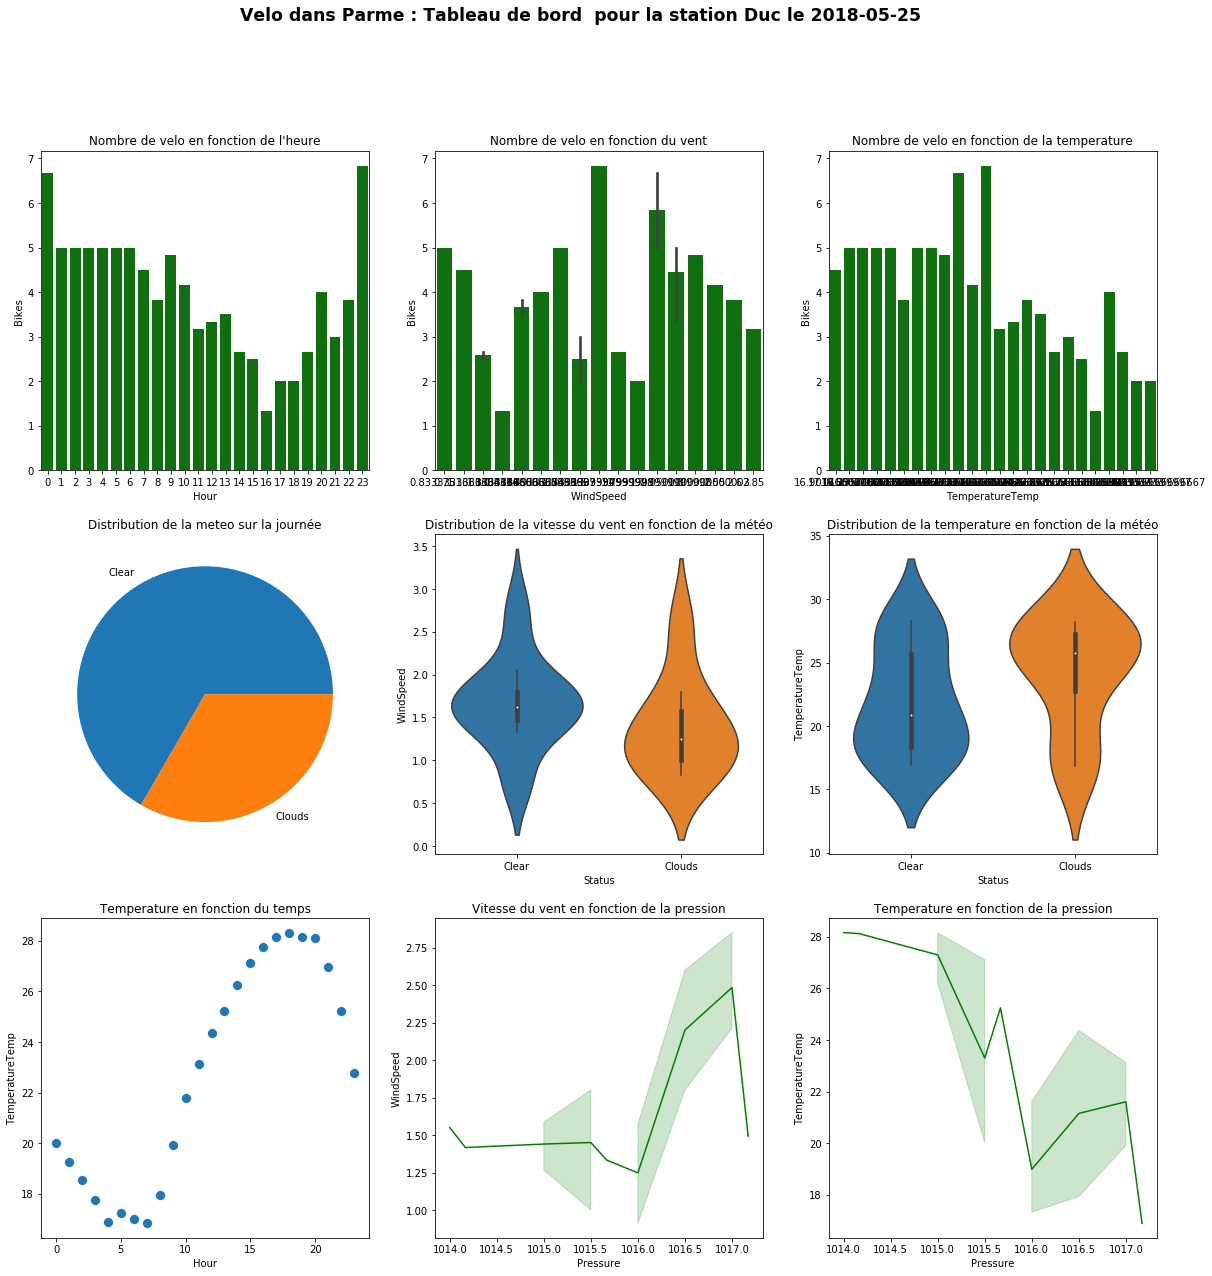

In [17]:
fig, axe = plt.subplots(nrows=3,ncols=3, figsize=(20, 20))
fig.suptitle("Vélo dans Parme : Tableau de bord  pour la station Duc le 2018-05-25", size='xx-large', weight='bold')

bar(day["Hour"], day["Bikes"], axe[0][0], title="Nombre de velo en fonction de l'heure")
bar(day["WindSpeed"], day["Bikes"], axe[0][1], title="Nombre de velo en fonction du vent")
bar(day["TemperatureTemp"], day["Bikes"], axe[0][2], title="Nombre de velo en fonction de la temperature")

pie(day["Status"], axe[1][0], title="Distribution de la meteo sur la journée")
violin(day["Status"], day["WindSpeed"],axe[1][1],title="Distribution de la vitesse du vent en fonction de la météo")
violin(day["Status"], day["TemperatureTemp"],axe[1][2],title="Distribution de la temperature en fonction de la météo")

scatter(day["Hour"], day["TemperatureTemp"], axe[2][0], title="Temperature en fonction du temps")
plot(day["Pressure"], day["WindSpeed"], axe[2][1], title="Vitesse du vent en fonction de la pression")
plot(day["Pressure"], day["TemperatureTemp"], axe[2][2], title="Temperature en fonction de la pression")